In [1]:
# Imports 
import pandas as pd
import numpy as np
import pylab as plt
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
# histogram function 

def pdf(data,upper,lower,size,name,xlab):
    bins_size = np.linspace(lower,upper,size)
    
    plt.figure()
    plt.hist(data, bins=bins_size, label=name)
    plt.xlabel(xlab)
    plt.legend()
    plt.yscale('log', nonpositive='clip')
    #plt.savefig("Local/images/IO_wait_pdf_{}.png".format(name), bbox_inches="tight")
    


In [3]:
# graphs for the profiling

def profilingtimings_graph(iostat_path,cpu_mem_path,bips_path,bops_path,command,store):
    
    # loading the data from the txt files 
    
    iostat_col3 = np.loadtxt(iostat_path,skiprows=6,usecols=3,dtype=str)
    iostat_col2 = np.loadtxt(iostat_path,skiprows=6,usecols=2,dtype=str)
    iostat_col3_wait = np.loadtxt(iostat_path,skiprows=3,usecols=3,dtype=str)
    
    bips = np.loadtxt(bips_path,dtype=float)
    bops = np.loadtxt(bops_path,dtype=float)
    
    cpu_mem_col2 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=0,dtype=str)
    cpu_mem_col3 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=3,dtype=str)
    cpu_mem_col4 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=4,dtype=str)
    
    # Splicing the data to get the correct data  from the output text and converted values into floats  
    
    iostat_kb_wrtn = list(map(float,iostat_col3[::5]))
    iostat_kb_read = list(map(float,iostat_col2[::5]))
    iostat_iowait  = list(map(float,iostat_col3_wait[::5]))
    
    ipn=np.where(cpu_mem_col2!="PID")[0]
    import more_itertools as mit
    ip=[list(group) for group in mit.consecutive_groups(ipn)]
    CPU=[]
    MEM=[]
    for i in range(len(ip)):
        ip1=ip[i]
        try:
            CPU.append(sum(list(map(float, cpu_mem_col3[ip1]))))
            MEM.append(sum(list(map(float, cpu_mem_col4[ip1]))))
        except:
            CPU.append(0.0)
            MEM.append(0.0)
    
    # The code sleeps for 10s after each command has finished running 
    sleep =-10
    
    # Plotting 
    
    plt.figure()
    #plt.plot(np.arange(0,len(iostat_kb_read),1),iostat_kb_read,label="kb_read/s")
    plt.plot(np.arange(0,len(iostat_kb_wrtn[1:sleep]),1),np.cumsum(iostat_kb_wrtn[1:sleep]),label="iostat: kb_wrtn/s")
    plt.xlabel("Elasped Time (secs)")
    plt.ylabel("Size (KB)")
    plt.title("{}_{}_IO_wrtn(disk)".format(store,command))
    plt.legend(loc='best')
    #plt.savefig("S3/images/IO_write_{}.png".format(command),bbox_inches="tight")
    
    plt.figure()
    plt.plot(np.arange(0,len(iostat_kb_read[1:sleep]),1),np.cumsum(iostat_kb_read[1:sleep]),label="iostat: kb_read/s")
    #plt.plot(np.arange(0,len(iostat_kb_wrtn),1),iostat_kb_wrtn,label="kb_wrtn/s")
    plt.xlabel("Elasped Time (secs)")
    plt.title("{}_{}_IO_read(disk)".format(store,command))
    plt.ylabel("Size (KB)")
    plt.legend(loc='best')
    #plt.savefig("S3/images/IO_read_{}.png".format(command), bbox_inches="tight")

    plt.figure()
    plt.plot(np.arange(0,len(bops[1:sleep]),1),np.cumsum(bops[1:sleep]*10**(-3)),label="Ifdata: writes (bops)")
    plt.xlabel("Elasped time (secs)")
    plt.ylabel("Size (KB)")
    plt.title("{}_{}_IO_wrtn(network)".format(store,command))
    plt.legend(loc='best')
    #plt.savefig("S3/images/IO_bops_{}.png".format(command), bbox_inches="tight")
    
    plt.figure()
    plt.plot(np.arange(0,len(bips[1:sleep]),1),np.cumsum(bips[1:sleep]*10**(-3)),label="Ifdata: reads (bips)")
    plt.xlabel("Elasped time (secs)")
    plt.ylabel("Size (KB/s)")
    plt.title("{}_{}_IO_read(network)".format(store,command))
    plt.legend(loc='best')
    #plt.savefig("S3/images/IO_bips_{}.png".format(command), bbox_inches="tight")
    
    plt.figure()
    plt.plot(np.arange(0,len(iostat_iowait[1:sleep]),1),iostat_iowait[1:sleep],label="iostat: iowait")
    plt.xlabel("Elasped time (secs)")
    plt.ylabel("Usage (%)")
    plt.title("{}_{}_IO_wait".format(store,command))
    plt.legend(loc='best')
    #plt.savefig("S3/images/IO_wait_{}.png".format(command), bbox_inches="tight")
    
    plt.figure()
    plt.plot(np.arange(0,len(CPU),1),CPU,label="CPU")
    plt.xlabel("Elasped Time (secs)")
    plt.ylabel("Usage (%)")
    plt.title("{}_{}_CPU".format(store,command))
    plt.legend(loc='best')
    #plt.savefig("S3/images/IO_CPU_{}.png".format(command), bbox_inches="tight")


    plt.figure()
    plt.plot(np.arange(0,len(MEM),1),MEM,label="RAM")
    plt.xlabel("Elasped Time (secs)")
    plt.title("{}_{}_RAM".format(store,command))
    plt.ylabel("Usage (%)")
    plt.legend(loc='best')
    #plt.savefig("S3/images/IO_MEM_{}.png".format(command))
    
    #print(len(CPU));
    return 
    

In [4]:
def profilingtimings(iostat_path,cpu_mem_path,bips_path,bops_path,command,store):
    
    # loading the data from the txt files 
    
    iostat_col3 = np.loadtxt(iostat_path,skiprows=6,usecols=3,dtype=str)
    iostat_col2 = np.loadtxt(iostat_path,skiprows=6,usecols=2,dtype=str)
    iostat_col3_wait = np.loadtxt(iostat_path,skiprows=3,usecols=3,dtype=str)
    
    bips = np.loadtxt(bips_path,dtype=float)
    bops = np.loadtxt(bops_path,dtype=float)
    
    cpu_mem_col2 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=0,dtype=str)
    cpu_mem_col3 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=3,dtype=str)
    cpu_mem_col4 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=4,dtype=str)
    
    # Splicing the data to get the vprrect data pint from the output text and convertvalues into floats
    
    iostat_kb_wrtn = list(map(float,iostat_col3[::5]))
    iostat_kb_read = list(map(float,iostat_col2[::5]))
    iostat_iowait  = list(map(float,iostat_col3_wait[::5]))
    
    ipn=np.where(cpu_mem_col2!="PID")[0]
    import more_itertools as mit
    ip=[list(group) for group in mit.consecutive_groups(ipn)]
    CPU=[]
    MEM=[]
    for i in range(len(ip)):
        ip1=ip[i]
        try:
            CPU.append(sum(list(map(float, cpu_mem_col3[ip1]))))
            MEM.append(sum(list(map(float, cpu_mem_col4[ip1]))))
        except:
            CPU.append(0.0)
            MEM.append(0.0)

    return len(CPU) ,sum(iostat_kb_wrtn),sum(iostat_kb_read ),np.median(CPU),np.median(MEM), np.mean(iostat_iowait) ,sum(bips) ,sum(bops)

In [5]:
# function that create the paths to the txt file 
def path(storage,command):
    cpu = "/home/vrs42921/LSST-RAL-ECHO-EXP/lsst/time_test/{}/{}/info_cpu_mem.txt" .format(storage,command)
    io = "/home/vrs42921/LSST-RAL-ECHO-EXP/lsst/time_test/{}/{}/info_iostat.txt" .format(storage,command)
    bips = "/home/vrs42921/LSST-RAL-ECHO-EXP/lsst/time_test/{}/{}/info_ifdata_bips.txt" .format(storage,command)
    bops = "/home/vrs42921/LSST-RAL-ECHO-EXP/lsst/time_test/{}/{}/info_ifdata_bops.txt" .format(storage,command)
    return cpu , io ,bips ,bops
# command line task / pipetasks 

com=["processccd","coaddtions","multiband"]

# end point storages 

store =["S3","S3_cd","cephfs","cephfs_cd","cephfs_reglocal","cephfs_reglocal_cd"]

# print formatting 

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
   NEXT ='\n'

In [6]:
# collating all the data into a list 

col1= []
for i in range(len(store)):
    for j in range(len(com)):
        times,sum_wrtn,sum_read,mean_cpu,mean_ram,mean_iowait,sum_bips,sum_bops = profilingtimings(path(store[i],com[j])[1],
                                                                                                   path(store[i],com[j])[0],
                                                                                                   path(store[i],com[j])[2],
                                                                                                   path(store[i],com[j])
                                                                                                   [3],com[j],store[i])
        col1.append(times)
        col1.append(sum_read*1e-3 + sum_bips*1e-6)
        col1.append(sum_wrtn*1e-3 + sum_bops*1e-6)
        col1.append(mean_iowait)
        col1.append(mean_cpu)
        col1.append(mean_ram)  





In [7]:
# Creating a Table of the data 

print(color.NEXT + color.BOLD + color.UNDERLINE + "{} (8 processes)" .format(store[0]) + color.END)
d = {'Processccd': col1[:6], 'Coaddtions': col1[6:12],'Multiband': col1[12:18]}
df = pd.DataFrame(data=d, index=["Time (seconds)","Total reads (disk + network) (MB)","Total writes (disk + network) (MB)",
                                 "Average io wait (%)",
                                 "Average CPU usage (%) (8 cores = 800% )","Average RAM usage (%) (32GB)"])
df.round(2)


S3 (8 processes)


,Processccd,Coaddtions,Multiband
Time (seconds),629.00,860.00,8670.00
Total reads (disk + network) (MB),4643.64,107811.28,9735.75
Total writes (disk + network) (MB),5847.01,6676.08,5246.78
Average io wait (%),0.22,0.14,0.01
Average CPU usage (%) (8 cores = 800% ),747.70,684.80,200.30
Average RAM usage (%) (32GB),11.50,29.65,44.00


In [8]:
# Creating a Table of the data

print(color.NEXT + color.BOLD + color.UNDERLINE + "{} (8 processes)" .format(store[1]) + color.END)
d2 = {'Processccd': col1[18:24], 'Coaddtions': col1[24:30],'Multiband': col1[30:36]}
df2 = pd.DataFrame(data=d2, index=["Time (seconds)","Total reads (disk + network) (MB)","Total writes (disk + network) (MB)",
                                 "Average io wait (%)",
                                 "Average CPU usage (%) (8 cores = 800% )","Average RAM usage (%) (32GB)"])
df2.round(2)


S3_cd (8 processes)


,Processccd,Coaddtions,Multiband
Time (seconds),761.00,1939.00,8738.00
Total reads (disk + network) (MB),8095.74,540483.47,17741.76
Total writes (disk + network) (MB),10992.59,36248.52,8452.98
Average io wait (%),0.22,0.18,0.02
Average CPU usage (%) (8 cores = 800% ),624.10,484.70,200.10
Average RAM usage (%) (32GB),11.50,27.05,43.90


In [9]:
# Creating a Table of the data
#print(col1)
#print(len(col1))

print(color.NEXT + color.BOLD + color.UNDERLINE + "{} (8 processes)" .format(store[2]) + color.END)
d3 = {'Processccd': col1[36:42], 'Coaddtions': col1[42:48],'Multiband': col1[48:54]}
df3 = pd.DataFrame(data=d3, index=["Time (seconds)","Total reads (disk + network) (MB)","Total writes (disk + network) (MB)",
                                 "Average io wait (%)",
                                 "Average CPU usage (%) (8 cores = 800% )","Average RAM usage (%) (32GB)"])
df3.round(2)


cephfs (8 processes)


,Processccd,Coaddtions,Multiband
Time (seconds),567.00,694.00,7801.00
Total reads (disk + network) (MB),1046.47,2264.32,1566.59
Total writes (disk + network) (MB),5451.67,5199.84,4674.75
Average io wait (%),0.36,0.25,0.03
Average CPU usage (%) (8 cores = 800% ),769.50,766.20,299.30
Average RAM usage (%) (32GB),11.00,31.10,42.00


In [10]:
print(color.NEXT + color.BOLD + color.UNDERLINE + "{} (8 processes)" .format(store[3]) + color.END)
d4 = {'Processccd': col1[54:60], 'Coaddtions': col1[60:66],'Multiband': col1[66:72]}
df4 = pd.DataFrame(data=d4, index=["Time (seconds)","Total reads (disk + network) (MB)","Total writes (disk + network) (MB)",
                                 "Average io wait (%)",
                                 "Average CPU usage (%) (8 cores = 800% )","Average RAM usage (%) (32GB)"])
df4.round(2)


cephfs_cd (8 processes)


,Processccd,Coaddtions,Multiband
Time (seconds),545.00,649.00,8902.00
Total reads (disk + network) (MB),782.35,15819.54,3976.92
Total writes (disk + network) (MB),10527.83,26307.98,6716.08
Average io wait (%),0.42,1.31,0.05
Average CPU usage (%) (8 cores = 800% ),780.10,690.60,200.30
Average RAM usage (%) (32GB),10.90,33.00,43.00


In [11]:
print(color.NEXT + color.BOLD + color.UNDERLINE + "{} (8 processes)" .format(store[4]) + color.END)
d5 = {'Processccd': col1[72:78], 'Coaddtions': col1[78:84],'Multiband': col1[84:90]}
df5 = pd.DataFrame(data=d5, index=["Time (seconds)","Total reads (disk + network) (MB)","Total writes (disk + network) (MB)",
                                 "Average io wait (%)",
                                 "Average CPU usage (%) (8 cores = 800% )","Average RAM usage (%) (32GB)"])
df5.round(2)


cephfs_reglocal (8 processes)


,Processccd,Coaddtions,Multiband
Time (seconds),608.00,705.00,8617.00
Total reads (disk + network) (MB),755.75,2547.98,1588.48
Total writes (disk + network) (MB),5604.04,5334.76,4685.78
Average io wait (%),0.41,0.28,0.03
Average CPU usage (%) (8 cores = 800% ),766.20,773.80,200.70
Average RAM usage (%) (32GB),11.00,32.15,43.40


In [12]:
print(color.NEXT + color.BOLD + color.UNDERLINE + "{} (8 processes)" .format(store[5]) + color.END)
d6 = {'Processccd': col1[90:96], 'Coaddtions': col1[96:102],'Multiband': col1[102:108]}
df6 = pd.DataFrame(data=d6, index=["Time (seconds)","Total reads (disk + network) (MB)","Total writes (disk + network) (MB)",
                                 "Average io wait (%)",
                                 "Average CPU usage (%) (8 cores = 800% )","Average RAM usage (%) (32GB)"])
df6.round(2)


cephfs_reglocal_cd (8 processes)


,Processccd,Coaddtions,Multiband
Time (seconds),518.00,711.00,9018.00
Total reads (disk + network) (MB),794.98,14414.65,3929.78
Total writes (disk + network) (MB),10564.48,26277.84,6601.07
Average io wait (%),0.44,1.24,0.05
Average CPU usage (%) (8 cores = 800% ),781.25,707.10,200.10
Average RAM usage (%) (32GB),11.00,33.60,43.90


<ipython-input-121-b8e50474b021>:94: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


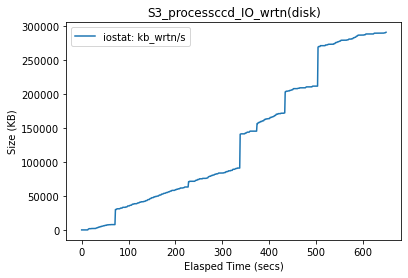

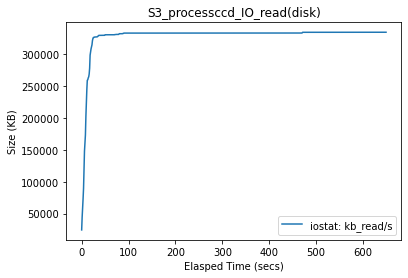

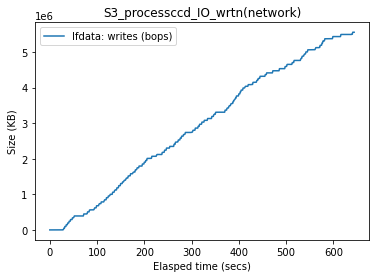

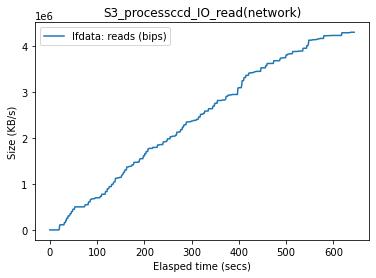

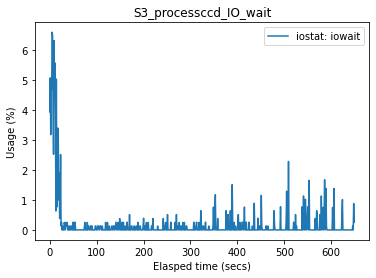

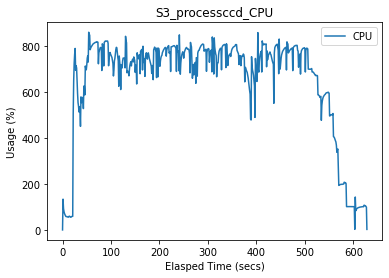

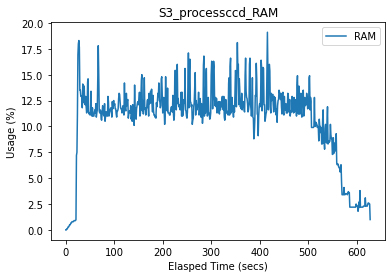

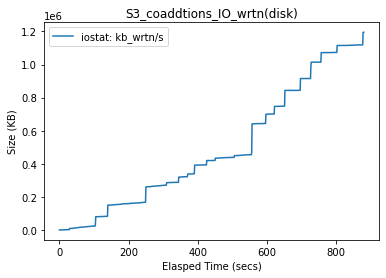

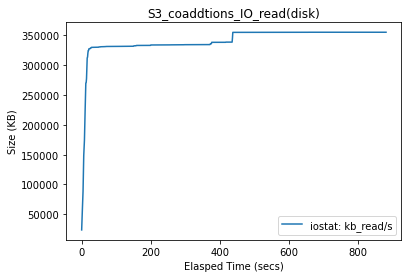

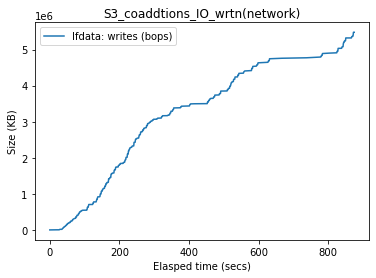

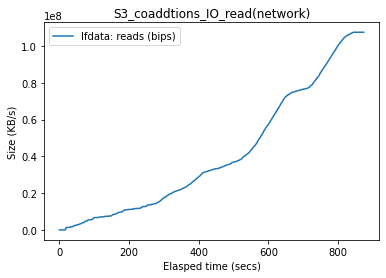

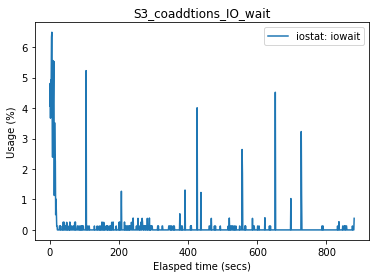

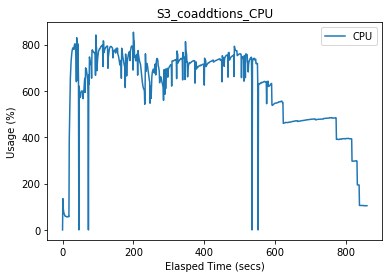

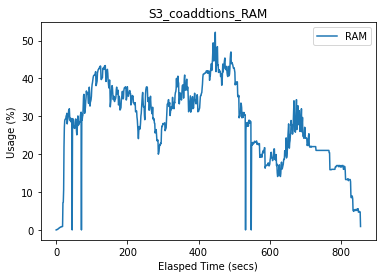

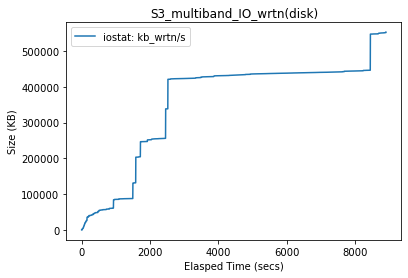

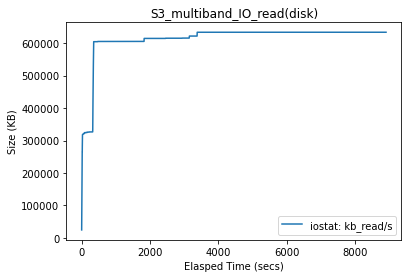

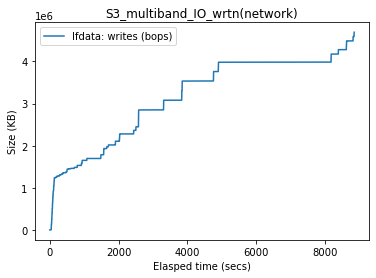

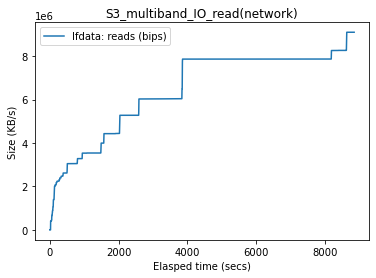

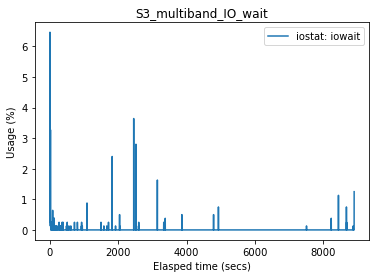

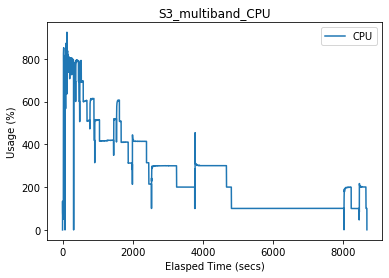

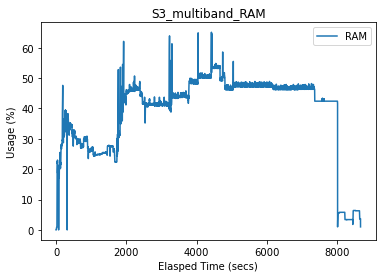

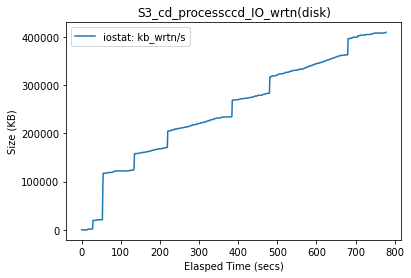

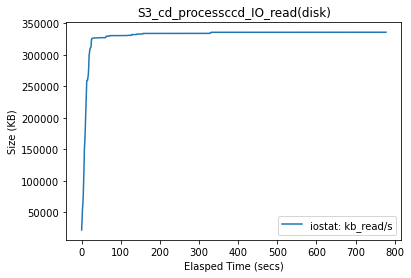

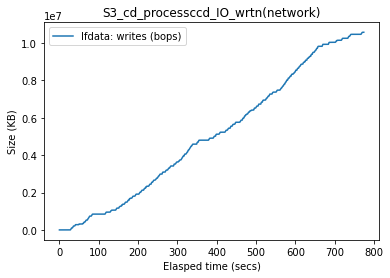

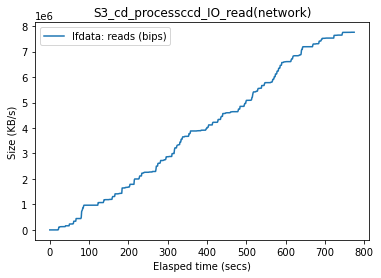

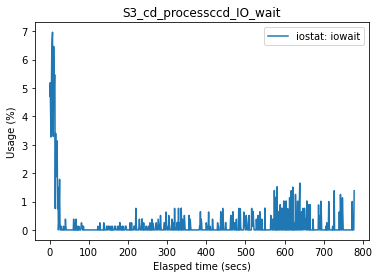

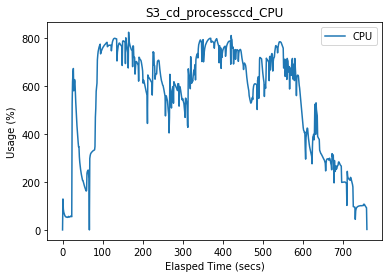

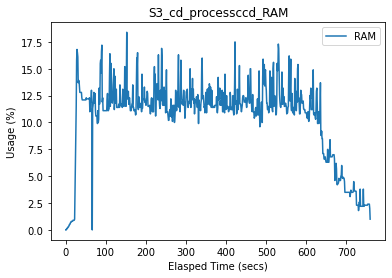

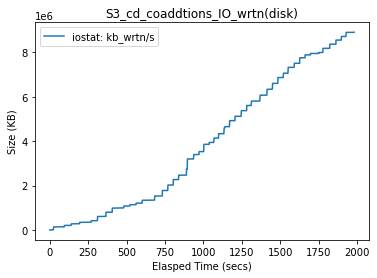

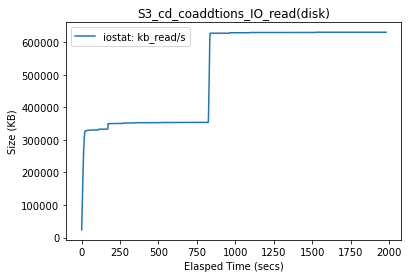

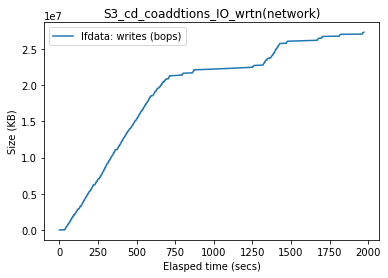

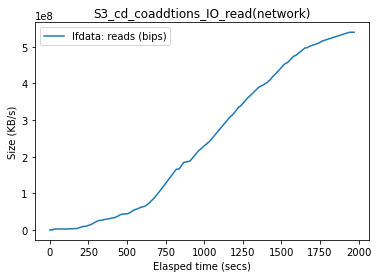

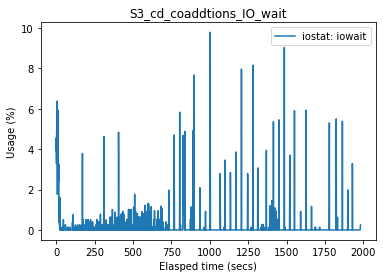

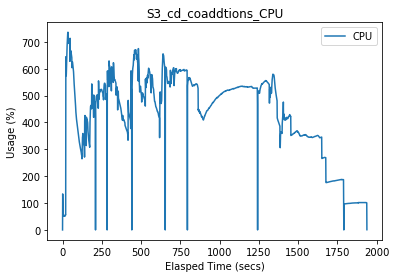

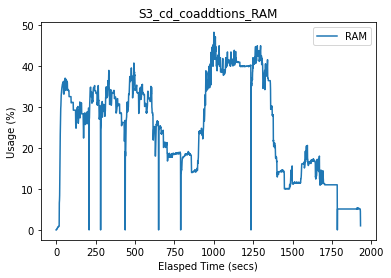

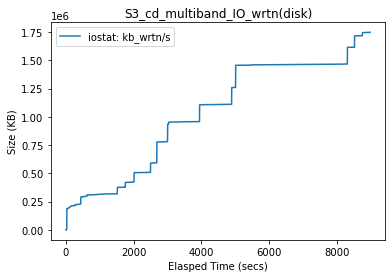

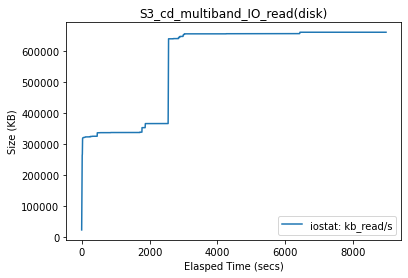

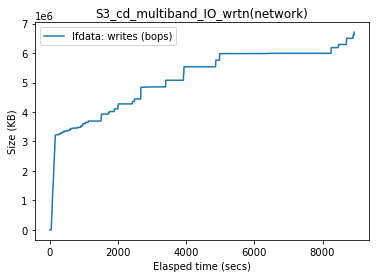

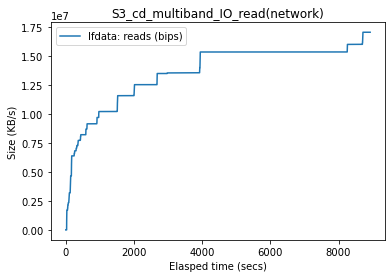

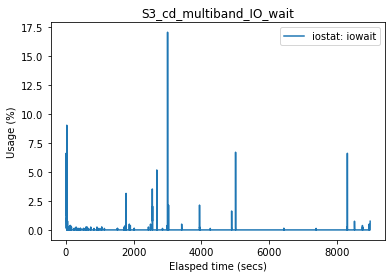

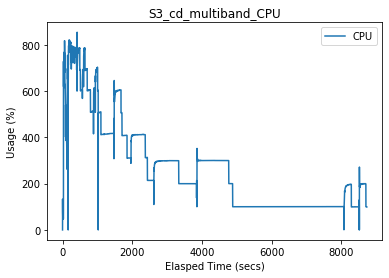

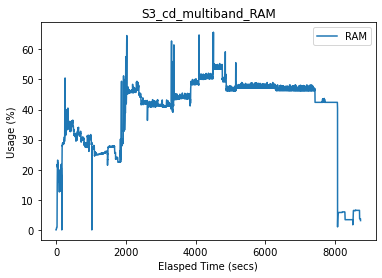

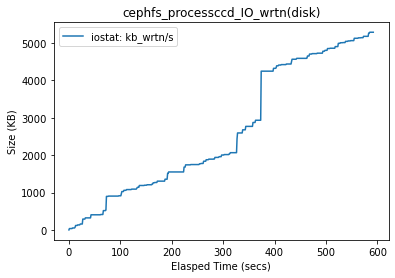

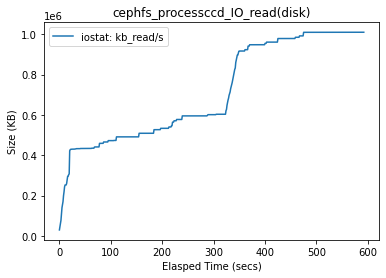

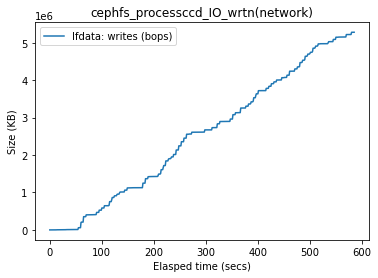

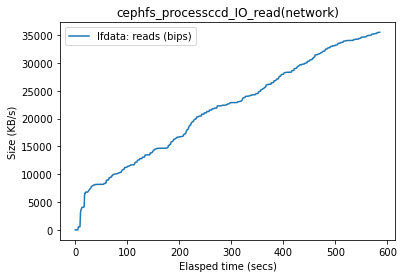

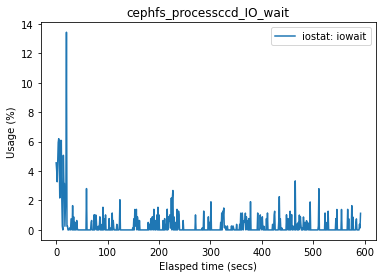

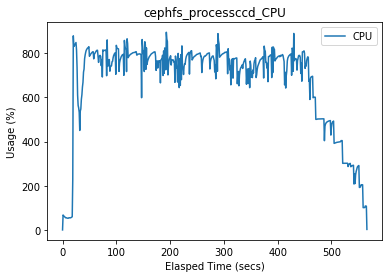

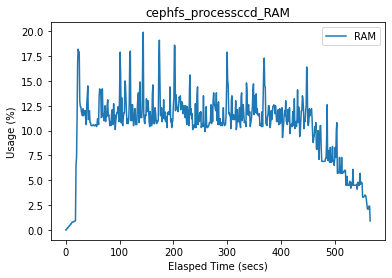

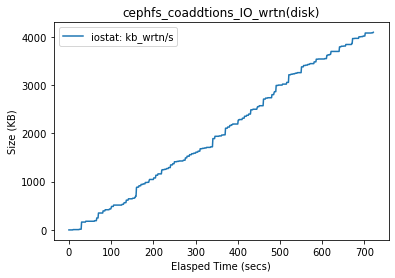

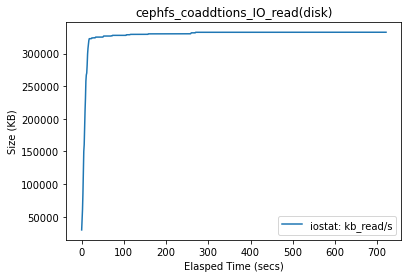

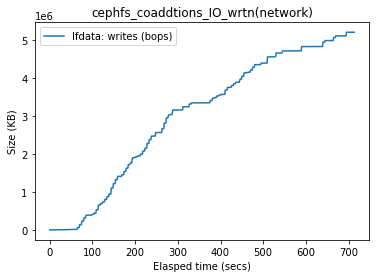

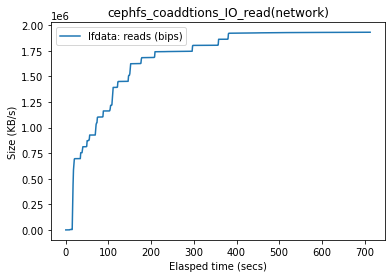

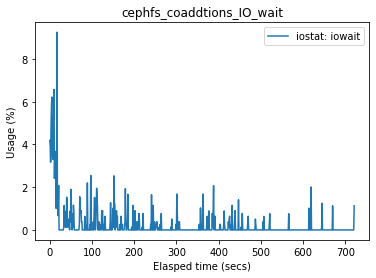

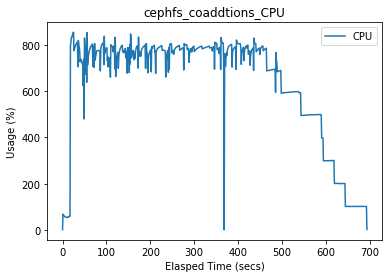

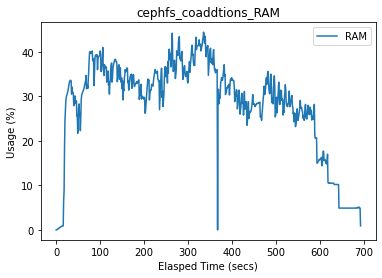

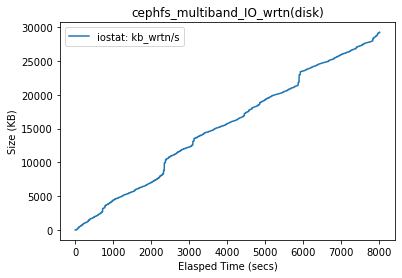

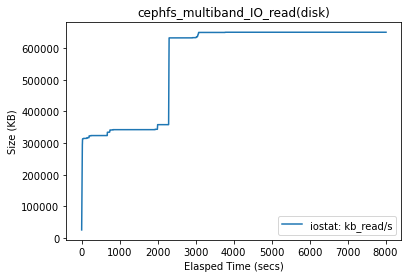

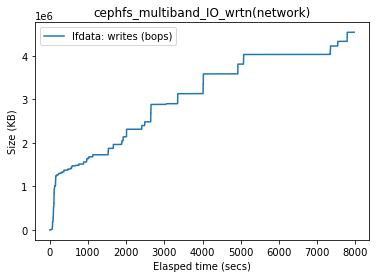

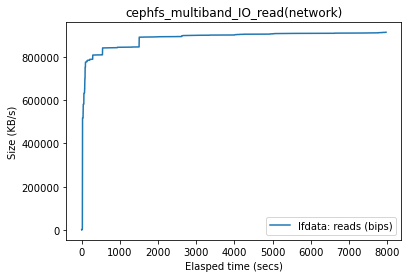

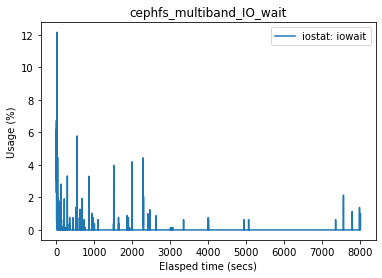

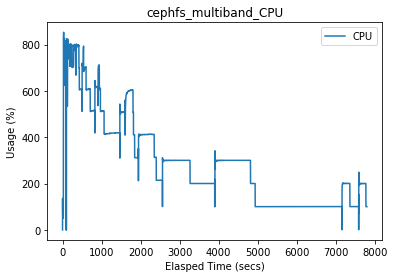

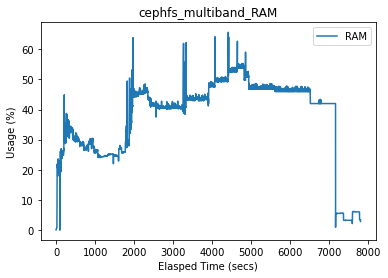

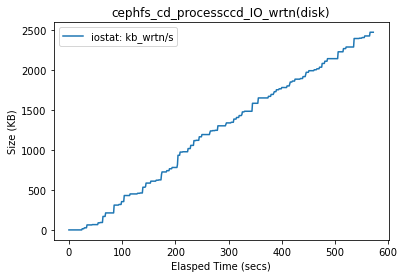

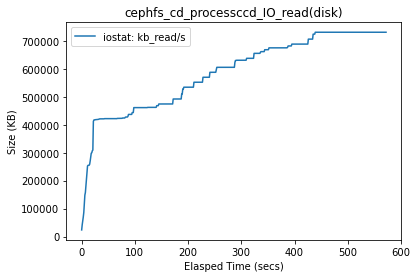

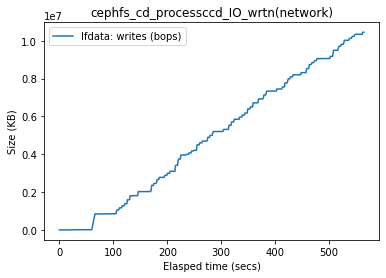

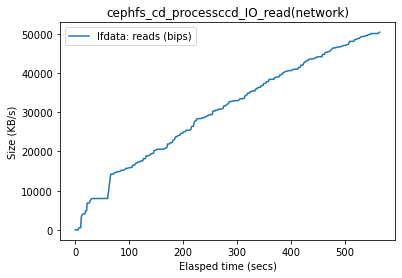

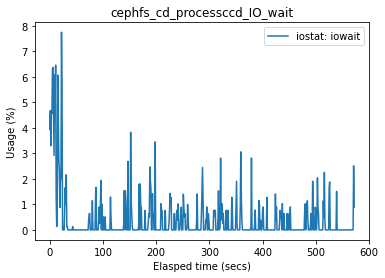

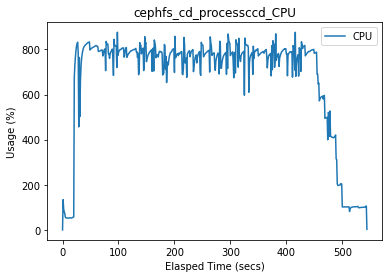

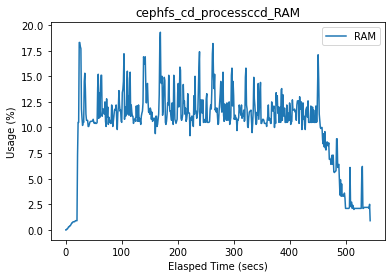

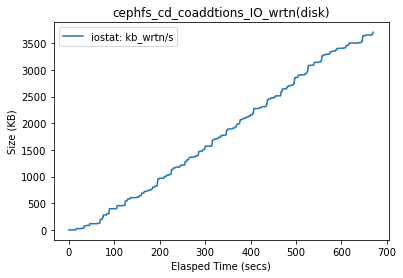

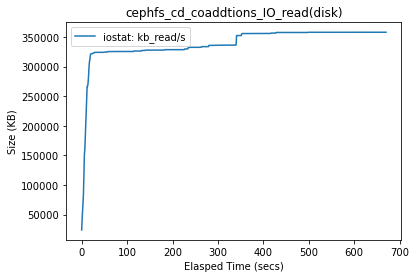

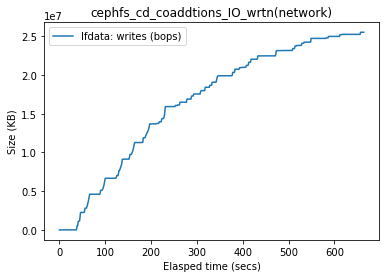

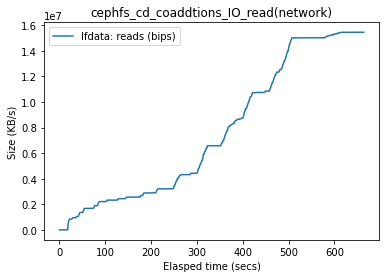

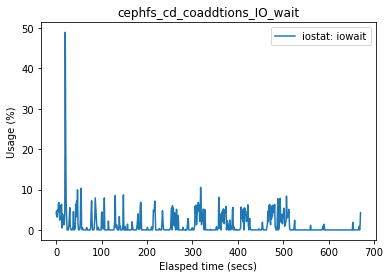

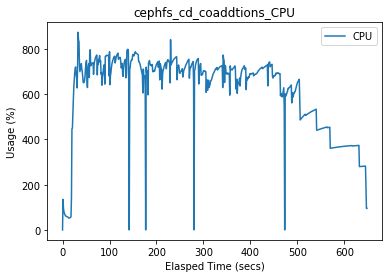

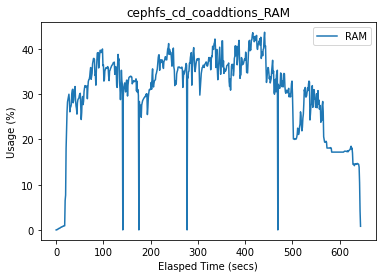

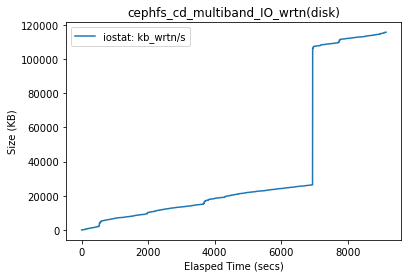

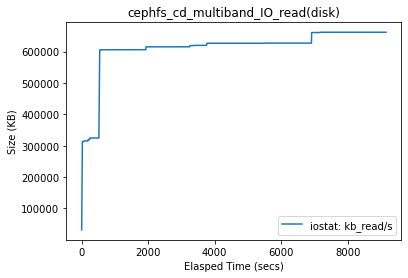

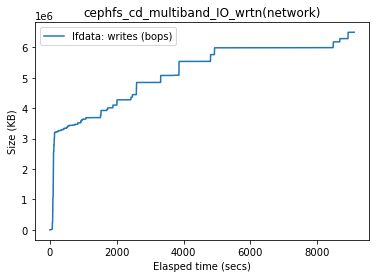

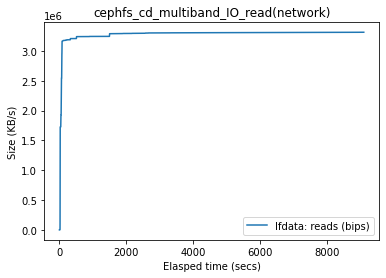

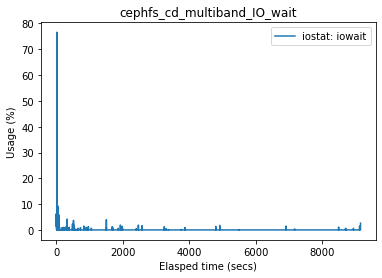

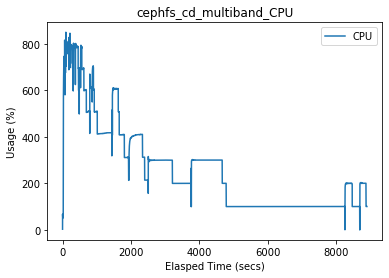

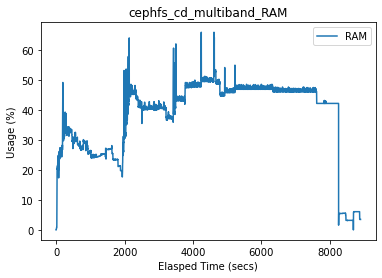

In [130]:
# Plottiing all of the profiliing plots 

for i in range(len(store)):
    for j in range(len(com)):
        times = profilingtimings_graph(path(store[i],com[j])[1],path(store[i],com[j])[0],path(store[i],com[j])[2],path(store[i],com[j])[3],com[j],store[i])
      